In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

## Purpose
### Predict delivery time using sorting time

In [2]:
delivery = pd.read_csv('D:/execlr/Assignments/Assignment 4/delivery_time.csv')
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

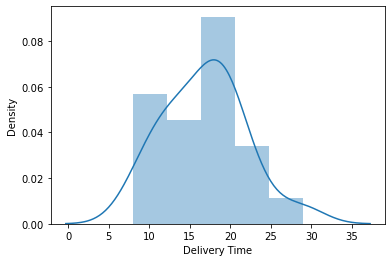

In [4]:
sns.distplot(delivery['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

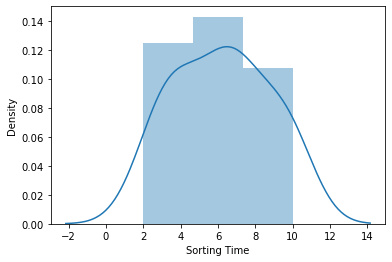

In [5]:
sns.distplot(delivery['Sorting Time'])

<AxesSubplot:title={'center':'Scatter Plot of Delivery Time'}, xlabel='Delivery Time', ylabel='Sorting Time'>

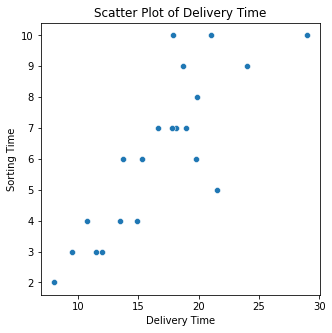

In [6]:
plt.figure(figsize=(5,5))
plt.title('Scatter Plot of Delivery Time')
sns.scatterplot(x='Delivery Time',y='Sorting Time',data=delivery,palette='set1')

In [7]:
# Renaming Columns
delivery=delivery.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
delivery

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [8]:
delivery.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

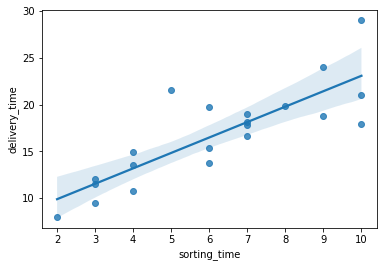

In [9]:
sns.regplot(x=delivery['sorting_time'],y=delivery['delivery_time'])

In [10]:
model=smf.ols("delivery_time~sorting_time",data=delivery).fit()

In [11]:
model

In [12]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [13]:
model.tvalues

Intercept       3.823349
sorting_time    6.387447
dtype: float64

In [14]:
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [15]:
model.rsquared

0.6822714748417231

In [16]:
model.rsquared_adj

0.6655489208860244

In [17]:
newdata = pd.Series([4,6,9])
newdata

0    4
1    6
2    9
dtype: int64

In [18]:
data_Pred= pd.DataFrame(newdata,columns = ['sorting_time'])
data_Pred

,sorting_time
0,4
1,6
2,9


In [19]:
# Manual Prediction for Sorting Time 5
time = (6.582734)+(1.649020)*4
time

13.178814

In [20]:
model.predict(data_Pred)

0    13.178814
1    16.476853
2    21.423913
dtype: float64

In [21]:
predicted1 = pd.DataFrame()
predicted1['Sorting_Time'] = delivery.sorting_time
predicted1['Delivery_Time'] = delivery.delivery_time
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(delivery))
predicted1


,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
